In [9]:
!date

Sun Oct 11 13:24:15 EDT 2015


In [58]:
import luther
import pandas as pd
import string 
import numpy as np
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [57]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'http://www.boxofficemojo.com/genres/chart/?id=foreign.htm'

In [3]:
movie_df = luther.all_movie_tables(url)

/Users/johnkeating/anaconda/lib/python2.7/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [4]:
movie_df.head()

,rank,title,studio,gross,theatres_life,opening,theaters_opening,date
1,1,"Crouching Tiger, Hidden Dragon(Taiwan)",SPC,"$128,078,872","2,027","$663,205",16,12/8/00
2,2,Life Is Beautiful(Italy),Mira.,"$57,563,264","1,136","$118,920",6,10/23/98
3,3,Hero(China),Mira.,"$53,710,019","2,175","$18,004,319","2,031",8/27/04
4,4,Instructions Not Included,LGF,"$44,467,206",978,"$7,846,426",348,8/30/13
5,5,Pan's Labyrinth(Mexico),PicH,"$37,634,615","1,143","$568,641",17,12/29/06


In [5]:
movie_df.tail()

,rank,title,studio,gross,theatres_life,opening,theaters_opening,date
1919,-,"Once Upon a Time Veronica (Era uma vez eu, Ver...",BWP,n/a,-,n/a,-,11/28/14
1920,-,Killers (2015),WGUSA,n/a,-,n/a,-,1/23/15
1921,-,Police Story: Lockdown,WGUSA,n/a,-,n/a,-,6/5/15
1922,-,A Lonely Hero,Emr.,n/a,-,n/a,-,5/8/15
1923,-,Number One Fan,Distrib.,n/a,-,n/a,-,9/4/15


In [6]:
len(movie_df)

1833

In [8]:
#reset the index
movie_df = movie_df.reset_index()
movie_df.iloc[0]

level_0                                                  0
index                                                    1
rank                                                     1
title               Crouching Tiger, Hidden Dragon(Taiwan)
studio                                                 SPC
gross                                         $128,078,872
theatres_life                                        2,027
opening                                           $663,205
theaters_opening                                        16
date                                               12/8/00
Name: 0, dtype: object

In [10]:
# remove country from the titles

titles = luther.get_foreign_movie_titles(movie_df)

In [12]:
movie_df['title'] = titles

In [13]:
movie_df.head()

,level_0,index,rank,title,studio,gross,theatres_life,opening,theaters_opening,date
0,0,1,1,"Crouching Tiger, Hidden Dragon",SPC,"$128,078,872","2,027","$663,205",16,12/8/00
1,1,2,2,Life Is Beautiful,Mira.,"$57,563,264","1,136","$118,920",6,10/23/98
2,2,3,3,Hero,Mira.,"$53,710,019","2,175","$18,004,319","2,031",8/27/04
3,3,4,4,Instructions Not Included,LGF,"$44,467,206",978,"$7,846,426",348,8/30/13
4,4,5,5,Pan's Labyrinth,PicH,"$37,634,615","1,143","$568,641",17,12/29/06


In [14]:
imdb_api_list = luther.imdb_api_list(titles)

In [22]:
reload(luther)
imdb_df = luther.get_imdb_info(imdb_api_list)

In [27]:
print imdb_df.head()
print imdb_df.tail()

                                              Actors  \
0  Yun-Fat Chow, Michelle Yeoh, Ziyi Zhang, Chen ...   
1  Roberto Benigni, Nicoletta Braschi, Giorgio Ca...   
2  Jet Li, Tony Chiu Wai Leung, Maggie Cheung, Zi...   
3  Andrés Vázquez, Hugo Stiglitz, Eugenio Derbez,...   
4  Ivana Baquero, Sergi López, Maribel Verdú, Dou...   

                                              Awards  \
0  Won 4 Oscars. Another 111 wins & 107 nominations.   
1    Won 3 Oscars. Another 60 wins & 42 nominations.   
2  Nominated for 1 Oscar. Another 31 wins & 29 no...   
3                            5 wins & 2 nominations.   
4   Won 3 Oscars. Another 103 wins & 72 nominations.   

                         Country            Director Error  \
0  Taiwan, Hong Kong, USA, China             Ang Lee   NaN   
1                          Italy     Roberto Benigni   NaN   
2               China, Hong Kong         Yimou Zhang   NaN   
3                         Mexico      Eugenio Derbez   NaN   
4             Sp

In [30]:
movie_gross = movie_df[['title', 'gross']]
metascore_awards = imdb_df[['Title', 'Error', 'Awards', 'Metascore']]
df_gross_predictors = pd.concat([movie_gross, metascore_awards], axis=1)

In [31]:
df_gross_predictors.head()

,title,gross,Title,Error,Awards,Metascore
0,"Crouching Tiger, Hidden Dragon","$128,078,872","Crouching Tiger, Hidden Dragon",NaN,Won 4 Oscars. Another 111 wins & 107 nominations.,93
1,Life Is Beautiful,"$57,563,264",Life Is Beautiful,NaN,Won 3 Oscars. Another 60 wins & 42 nominations.,59
2,Hero,"$53,710,019",Hero,NaN,Nominated for 1 Oscar. Another 31 wins & 29 no...,84
3,Instructions Not Included,"$44,467,206",Instructions Not Included,NaN,5 wins & 2 nominations.,55
4,Pan's Labyrinth,"$37,634,615",Pan's Labyrinth,NaN,Won 3 Oscars. Another 103 wins & 72 nominations.,98


In [32]:
df_gross_predictors.tail()

,title,gross,Title,Error,Awards,Metascore
1828,Once Upon a Time Veronica,n/a,Once Upon a Time Veronica,NaN,10 wins & 3 nominations.,73
1829,Killers,n/a,Killers,NaN,2 wins & 3 nominations.,21
1830,Police Story: Lockdown,n/a,Police Story: Lockdown,NaN,N/A,44
1831,A Lonely Hero,n/a,NaN,Movie not found!,NaN,NaN
1832,Number One Fan,n/a,Number One Fan,NaN,1 win & 6 nominations.,N/A


In [36]:
# get award nominations
df_gross_predictors['award_numbers'] = df_gross_predictors[
    'Awards'].apply(lambda x: str(x).translate(None, string.letters))

df_gross_predictors['award_numbers'] = df_gross_predictors[
    'award_numbers'].apply(lambda x: str(x).translate(None, string.punctuation))

df_gross_predictors['award_numbers'] = df_gross_predictors[
    'award_numbers'].apply(lambda x: x.split())

df_gross_predictors['nominations'] = df_gross_predictors[
    'award_numbers'].apply(lambda x: x[-1] if len(x) != 0 else 0)

In [37]:
# drop everything with no imdb information 
df_gross_predictors = df_gross_predictors[df_gross_predictors['Error'] != 'Movie not found!']

In [38]:
len(df_gross_predictors)

1681

In [47]:
# convert string n/as to Nans and convert strings to integers
# gross
df_gross_predictors['gross'] = df_gross_predictors[
    'gross'].apply(lambda x: str(x).translate(None, string.punctuation))
df_gross_predictors['gross'][df_gross_predictors.gross == 'na'] = np.nan
df_gross_predictors['gross'][df_gross_predictors.gross == 'nan'] = np.nan
df_gross_predictors = df_gross_predictors[pd.notnull(df_gross_predictors['gross'])]
df_gross_predictors['gross'] = df_gross_predictors['gross'].astype(int)

# awards
df_gross_predictors['nominations'] = df_gross_predictors['nominations'].astype(int)

# metascore
df_gross_predictors = df_gross_predictors[pd.notnull(df_gross_predictors['Metascore'])]
df_gross_predictors = df_gross_predictors[df_gross_predictors['Metascore'] != 'N/A']
df_gross_predictors['Metascore'] = df_gross_predictors['Metascore'].astype(int)

/Users/johnkeating/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/johnkeating/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
df_gross_predictors.head()

,title,gross,Title,Error,Awards,Metascore,award_numbers,nominations
0,"Crouching Tiger, Hidden Dragon",128078872,"Crouching Tiger, Hidden Dragon",NaN,Won 4 Oscars. Another 111 wins & 107 nominations.,93,"[4, 111, 107]",107
1,Life Is Beautiful,57563264,Life Is Beautiful,NaN,Won 3 Oscars. Another 60 wins & 42 nominations.,59,"[3, 60, 42]",42
2,Hero,53710019,Hero,NaN,Nominated for 1 Oscar. Another 31 wins & 29 no...,84,"[1, 31, 29]",29
3,Instructions Not Included,44467206,Instructions Not Included,NaN,5 wins & 2 nominations.,55,"[5, 2]",2
4,Pan's Labyrinth,37634615,Pan's Labyrinth,NaN,Won 3 Oscars. Another 103 wins & 72 nominations.,98,"[3, 103, 72]",72


In [49]:
df_gross_predictors.tail()

,title,gross,Title,Error,Awards,Metascore,award_numbers,nominations
1763,It's All So Quiet,724,It's All So Quiet,NaN,3 wins & 7 nominations.,72,"[3, 7]",7
1766,Steve + Sky,624,Steve + Sky,NaN,2 wins & 4 nominations.,44,"[2, 4]",4
1767,Anatomy 2,623,Anatomy 2,NaN,1 win & 2 nominations.,46,"[1, 2]",2
1768,The Sugar Curtain,582,The Sugar Curtain,NaN,4 wins & 1 nomination.,66,"[4, 1]",1
1770,Falling,509,Falling,NaN,3 wins & 2 nominations.,56,"[3, 2]",2


In [54]:
len(df_gross_predictors[df_gross_predictors.gross < 10000])

# I don't know whether to trust these - there are at 10 that are less than $1,000 maybe cut theses?

137

In [56]:
reg_df = df_gross_predictors[['title', 'gross', 'Metascore', 'nominations']]

In [74]:
test_df = reg_df.sample(frac=0.2)
train_df = reg_df[~reg_df.isin(test_df)]

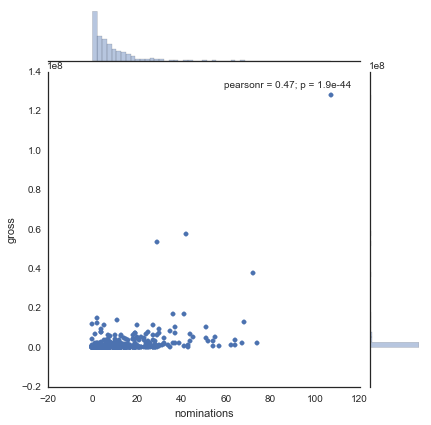

In [75]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='nominations', y='gross', kind='scatter', data=train_df)

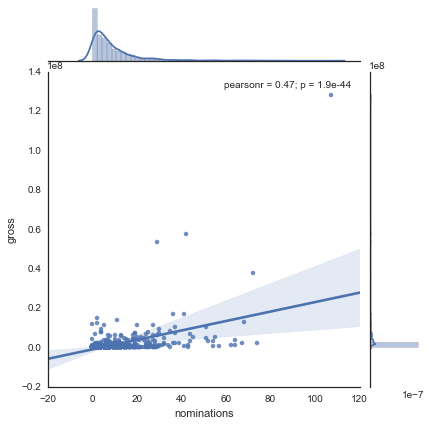

In [76]:
sns.jointplot(x='nominations', y='gross', kind='reg', data=train_df)

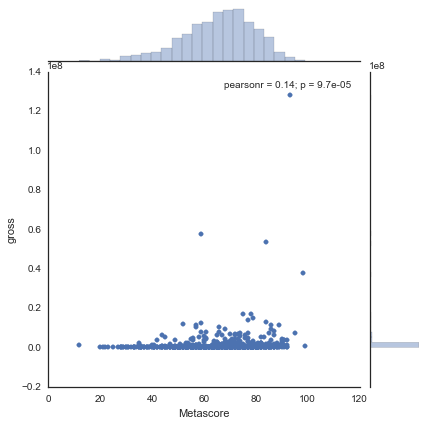

In [77]:
sns.jointplot(x='Metascore', y='gross', kind='scatter', data=train_df)

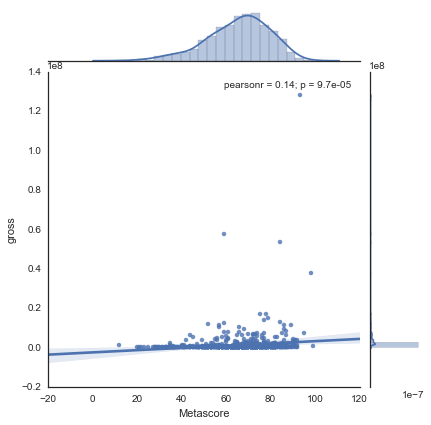

In [78]:
sns.jointplot(x='Metascore', y='gross', kind='reg', data=train_df)

NameError: name 'train_df' is not defined

In [80]:
y, X = dmatrices('gross ~ Metascore + nominations', data=train_df, return_type='dataframe')

In [81]:
model = sm.OLS(y, X)
results = model.fit()

In [82]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     111.0
Date:                Sun, 11 Oct 2015   Prob (F-statistic):           3.51e-43
Time:                        19:22:31   Log-Likelihood:                -13329.
No. Observations:                 790   AIC:                         2.666e+04
Df Residuals:                     787   BIC:                         2.668e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    -8.94e+05   8.79e+05     -1.017      0.309     -2.62e+06  8.32e+05
Metascore   -1529.1550   1.36e+04     -0.112      0.911     -2.83e+04  2.52e+04
nominations  2.405e+05   1.69e+04     14.235      0.000      2.07e+05  2.74e+05
==============================================================================
Omnibus:                     1450.122   Durbin-Watson:                   0.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1670276.996
Skew:                          12.363   Prob(JB):                         0.00
Kurtosis:                     226.900   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
print results.params

Intercept     -893991.149352
Metascore       -1529.155003
nominations    240482.137772
dtype: float64


In [84]:
results2 = smf.ols(formula="gross ~ nominations", data=train_df).fit()

In [85]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     222.2
Date:                Sun, 11 Oct 2015   Prob (F-statistic):           1.88e-44
Time:                        19:23:44   Log-Likelihood:                -13329.
No. Observations:                 790   AIC:                         2.666e+04
Df Residuals:                     788   BIC:                         2.667e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    -9.89e+05   2.35e+05     -4.208      0.000     -1.45e+06 -5.28e+05
nominations  2.399e+05   1.61e+04     14.906      0.000      2.08e+05  2.72e+05
==============================================================================
Omnibus:                     1450.394   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1671951.295
Skew:                          12.368   Prob(JB):                         0.00
Kurtosis:                     227.012   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
results2.params

Intercept     -989023.611997
nominations    239909.718604
dtype: float64

In [87]:
test_results = smf.ols(formula="gross ~ nominations", data=test_df).fit()

In [88]:
test_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     16.46
Date:                Sun, 11 Oct 2015   Prob (F-statistic):           7.18e-05
Time:                        19:24:30   Log-Likelihood:                -3265.7
No. Observations:                 198   AIC:                             6535.
Df Residuals:                     196   BIC:                             6542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    3.352e+05   3.31e+05      1.011      0.313     -3.18e+05  9.89e+05
nominations  8.689e+04   2.14e+04      4.057      0.000      4.46e+04  1.29e+05
==============================================================================
Omnibus:                      372.144   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122373.289
Skew:                          10.045   Prob(JB):                         0.00
Kurtosis:                     123.123   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

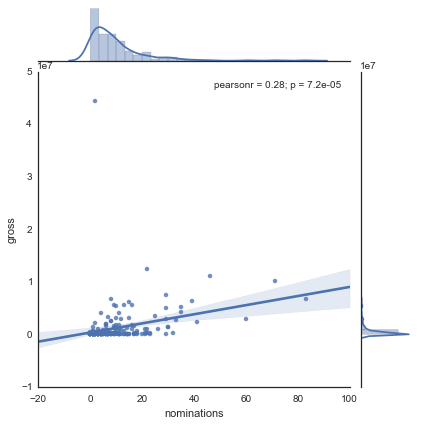

In [89]:
sns.jointplot(x='nominations', y='gross', kind='reg', data=test_df)